In [97]:
#import libraries

import random
import bisect
import numpy as np# Define input features:
from numpy import random
from IPython.display import clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt




# variable inputs
SEED = None

counter = 0

# *** OUTPUT: customer_times[] contains customer arrival times tuple (customer #, arrival time (hr))

## code below

random.seed(SEED)
vhrthin = pd.read_csv("thinningdata.csv")

## with original thinning algo

maxlambda = np.max(vhrthin.perhr)+.3

print("max lambda: ", maxlambda)

#generate first customer arrival
u1 = random.uniform(0,1)

lambda0 = vhrthin.loc[vhrthin.index == 0, 'perhr'].iloc[0]


cust1 = -1/lambda0*np.log(u1)

vtime = cust1


cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default


cust_ftotal = []
customer_startinendin = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = vhrthin.loc[vhrthin.hr == tlambda,'perhr'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_startinendin.append((ncust, cust_total[x]))
        ncust +=1

'''
##print list
cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()
'''


customer_startinendin ## contains new customer arrivals in list of tuples [(cust #, arrival time in hrs)]


max lambda:  2.1038461538461535


24.587280659055676

'\n##print list\ncust_ftotal = pd.DataFrame(cust_ftotal)\ncust_ftotal.columns = ["arrival_time"]\ncust_ftotal[\'arrhour\'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))\ncust_ftotal.groupby(\'arrhour\').agg(vcount = (\'arrhour\',\'count\'))\n(cust_ftotal.groupby(\'arrhour\').agg(vcount = (\'arrhour\',\'count\'))).sum()\n'

[(1, 5.927995915874587),
 (2, 7.532597329545164),
 (3, 8.509881764550133),
 (4, 8.975782586691764),
 (5, 9.006097748837487),
 (6, 9.214927421338759),
 (7, 12.205055768402582),
 (8, 12.821997910917048),
 (9, 14.382799772635835),
 (10, 15.12653267803147),
 (11, 17.057727677502772),
 (12, 18.228968045793934),
 (13, 18.311588421453543),
 (14, 18.46891293300463),
 (15, 18.65588737678517),
 (16, 19.082277627697597),
 (17, 19.56926221213118),
 (18, 19.650311056446903),
 (19, 20.779709911610766),
 (20, 22.256723095288574),
 (21, 22.31106914729182),
 (22, 23.974361336856084)]

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Arrival times of interal customers')

Text(0.5, 0, 'Customer #')

Text(0, 0.5, 'Arrival time (t) hr')

([<matplotlib.axis.XTick at 0x7f67c6457880>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22')])

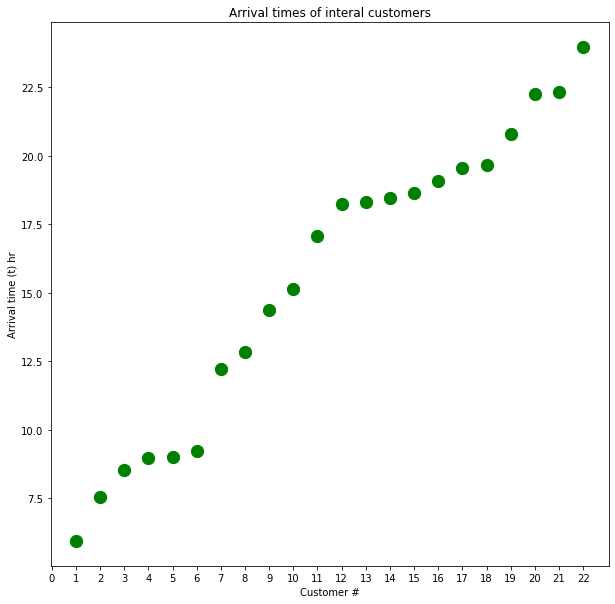

In [98]:
##print customer times (hrs ie 18.60 == 6:36PM)

cus_pts =np.array([[customer_startinendin[x][0],customer_startinendin[x][1]] for x in range(len(customer_startinendin))])

#cus_pts


## Graph integral of poisson arrival non-stationary function lamda(t) wrt time t

plt.figure(figsize=(10,10))
#plt.plot(vhrthin.index, vhrthin.vcumsum)
plt.title(r'Arrival times of interal customers')
plt.xlabel('Customer #')
plt.ylabel(r'Arrival time (t) hr')
plt.xticks(np.arange(cus_pts.shape[0]+1),labels=np.arange(cus_pts.shape[0]+1))
#plt.scatter(vhrthin.index,vhrthin.vcumsum,s=150,color='r', zorder=2)
#plt.scatter(p_pts[:,0],p_pts[:,1],s=150,color='b', zorder=2)
plt.scatter(cus_pts[:,0],cus_pts[:,1],s=150,color='g', zorder=2)

In [68]:
vhrthin

,hr,poisson,hrtime,perhr,vcumsum
0,0,1.291667,0,0.215278,0.215278
1,1,1.291667,60,0.215278,0.430556
2,2,1.291667,120,0.215278,0.645833
3,3,1.291667,180,0.215278,0.861111
4,4,1.291667,240,0.215278,1.076389
5,5,1.291667,300,0.215278,1.291667
6,6,4.523810,360,1.130952,2.422619
7,7,4.523810,420,1.130952,3.553571
8,8,4.523810,480,1.130952,4.684524
9,9,4.523810,540,1.130952,5.815476


In [6]:
## GET ARRIVAL TIMES FOR NON-CLOSED ARCS IE [START,END) AND (START,END]

dfoos = pd.read_csv("outofsystems.csv")

dfoos

,hour,startinendout_lambda,loglambda,startoutendin_lambda
0,0.0,1.000000,0.000000,2.181818
1,1.0,1.000000,0.000000,1.703704
2,2.0,1.000000,0.000000,1.111111
3,3.0,1.000000,0.000000,1.000000
4,4.0,1.000000,0.000000,1.125000
5,5.0,6.461538,1.865867,2.678571
6,6.0,16.153846,2.782158,6.738462
7,7.0,38.076923,3.639608,8.246154
8,8.0,38.076923,3.639608,15.369231
9,9.0,19.076923,2.948479,8.153846


In [7]:
## arrival times for those that start IN network but end OUTSIDE network [start,end)


## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(dfoos.startinendout_lambda)


#generate first customer arrival
u1 = random.uniform(0,1)

lambda0 = dfoos.loc[dfoos.index == 0, 'startinendout_lambda'].iloc[0]


cust1 = -1/lambda0*np.log(u1)

vtime = cust1


cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default

len(cust_total)

cust_ftotal = []
customer_startinendout = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = dfoos.loc[dfoos.hour == tlambda,'startinendout_lambda'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_startinendout.append((ncust, cust_total[x]))
        ncust +=1

cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))

##print list
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()

customer_startinendout

24.019687929875232

896

,vcount
arrhour,
0.0,1
1.0,1
2.0,2
3.0,1
5.0,3
6.0,5
7.0,50
8.0,41
9.0,19


vcount    297
dtype: int64

[(1, 0.6099819007711359),
 (2, 1.3499708709067746),
 (3, 2.1917751376057497),
 (4, 2.877942217861675),
 (5, 3.2150958319025382),
 (6, 5.196676094112156),
 (7, 5.297529882520146),
 (8, 5.7100860509244855),
 (9, 6.129945218331379),
 (10, 6.345009771235111),
 (11, 6.463703065901692),
 (12, 6.547028646709885),
 (13, 6.8659350537927475),
 (14, 7.010175013960968),
 (15, 7.0222029619813835),
 (16, 7.0400592231909505),
 (17, 7.0455282387391485),
 (18, 7.052418660908186),
 (19, 7.0595527827005204),
 (20, 7.0669340111842525),
 (21, 7.089846784494069),
 (22, 7.11991350370731),
 (23, 7.13034422301642),
 (24, 7.130672559944319),
 (25, 7.136031520672004),
 (26, 7.167378905541844),
 (27, 7.169742624120588),
 (28, 7.239918079855869),
 (29, 7.251939050247418),
 (30, 7.258514674790151),
 (31, 7.307321590803398),
 (32, 7.3477736769851605),
 (33, 7.352896258978572),
 (34, 7.390594768062904),
 (35, 7.398668856169489),
 (36, 7.398979617704292),
 (37, 7.410405865139817),
 (38, 7.422519793815392),
 (39, 7.435

In [8]:
## arrival times for those that start OUT network but end INSIDE network (start,end]

## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(dfoos.startoutendin_lambda)


#generate first customer arrival
u1 = random.uniform(0,1)

lambda0 = dfoos.loc[dfoos.index == 0, 'startoutendin_lambda'].iloc[0]


cust1 = -1/lambda0*np.log(u1)

vtime = cust1


cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default

len(cust_total)



cust_ftotal = []
customer_startoutendin = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = dfoos.loc[dfoos.hour == tlambda,'startoutendin_lambda'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_startoutendin.append((ncust, cust_total[x]))
        ncust +=1

cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))

##print list
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()

customer_startoutendin

24.006379015519055

930

,vcount
arrhour,
0.0,1
2.0,1
4.0,1
5.0,2
6.0,9
7.0,10
8.0,14
9.0,10
10.0,5


vcount    259
dtype: int64

[(1, 0.8835283633174364),
 (2, 2.662804202067807),
 (3, 4.933292989721081),
 (4, 5.0449319915108655),
 (5, 5.855627947373167),
 (6, 6.0848544408610055),
 (7, 6.095921216695736),
 (8, 6.35063432143346),
 (9, 6.518876169381317),
 (10, 6.600424807392939),
 (11, 6.852249175496136),
 (12, 6.909623344937349),
 (13, 6.956116140634143),
 (14, 6.956320288962217),
 (15, 7.015763895367914),
 (16, 7.104509654435101),
 (17, 7.13488079805008),
 (18, 7.162395160951403),
 (19, 7.62565730452388),
 (20, 7.697075883134433),
 (21, 7.73762896271776),
 (22, 7.742851924672672),
 (23, 7.7832533062200175),
 (24, 7.839241612740631),
 (25, 8.253187820848815),
 (26, 8.34638341882205),
 (27, 8.40941882670417),
 (28, 8.430393275608619),
 (29, 8.431216519941561),
 (30, 8.438179693415254),
 (31, 8.457419872746764),
 (32, 8.478961411807674),
 (33, 8.505849956511026),
 (34, 8.568669296662256),
 (35, 8.69343665677575),
 (36, 8.761259783759215),
 (37, 8.797168505342304),
 (38, 8.886661392284688),
 (39, 9.059209476257902)